# Introduction

### This notebook has all the processes that were run for my final project for the course AI395T Case Studies in Machine Learning at The University of Texas at Austin. The title of the project, Hurricane Intensity Prediction for Puerto Rico using Machine Learning Techniques, talks a little bit about the background history of Puerto Rico, how hurricanes affect the Island and how Machine Learning is an important tool that can be used to determine hurricane intensity in the future in the caribbean so that more extreme measures can be taken to protect its residents. Through this Notebook I will showcase all the data that was used and all the models that were ran. 

### When we talk about hurricane intensity, we will be referring to Maximum Sustained Wind Speed in MpH and central pressure over hurricane season in Puerto Rio

# Data Collection

### For this paper, we will be using the HURDAT2 Database from the National Oceanic and Atmospheric Administration (NOAA). This one sadly is only updated until the year 2014, in a csv called Atlantic.csv as well as a hurricanelistuptodate.xlx fileset. We will be only recollecting and using data for hurricanes in the atalantic until 2023 starting from the 1899. 1899 was selected as a starting date because Hurricane San Ciriaco ravaged Puerto Rico, drowning over 3,000 habitants at the time. Only a few months had passed since the USA had taken control of the island in 1898. 

### We will be focusing on Sea Surface Temperatures (SST), Wind Shear, Atmospheric Moisture. 

### Python Imports

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Datasets

In [52]:
# Load the dataset
# For now this is just the dataset from 1858 to 2014 of atlantic hurricanse
file_path = 'atlantic.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Display the column names and data types
print(data.info())


         ID                 Name      Date  Time Event Status Latitude  \
0  AL011851              UNNAMED  18510625     0           HU    28.0N   
1  AL011851              UNNAMED  18510625   600           HU    28.0N   
2  AL011851              UNNAMED  18510625  1200           HU    28.0N   
3  AL011851              UNNAMED  18510625  1800           HU    28.1N   
4  AL011851              UNNAMED  18510625  2100     L     HU    28.2N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0     94.8W            80              -999  ...         -999         -999   
1     95.4W            80              -999  ...         -999         -999   
2     96.0W            80              -999  ...         -999         -999   
3     96.5W            80              -999  ...         -999         -999   
4     96.8W            80              -999  ...         -999         -999   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0        

### Data Cleaning and handling

In [55]:
# Replace -999 with NaN
data.replace(-999, np.nan, inplace=True)

# Check the number of missing values per column
print(data.isnull().sum())


ID                      0
Name                    0
Date                    0
Time                    0
Event                   0
Status                  0
Latitude                0
Longitude               0
Maximum Wind            0
Minimum Pressure    30669
Low Wind NE         43184
Low Wind SE         43184
Low Wind SW         43184
Low Wind NW         43184
Moderate Wind NE    43184
Moderate Wind SE    43184
Moderate Wind SW    43184
Moderate Wind NW    43184
High Wind NE        43184
High Wind SE        43184
High Wind SW        43184
High Wind NW        43184
dtype: int64


In [57]:
# Step 1: Clean the 'Date' column by removing any non-numeric characters
data['Date'] = data['Date'].astype(str).str.extract('(\d{8})', expand=False)

# Step 2: Convert the 'Date' column to datetime format, considering only year, month, and day
data['Datetime'] = pd.to_datetime(data['Date'], format='%Y%m%d', errors='coerce')

# Step 3: Extract the year from the 'Datetime' column
data['Year'] = data['Datetime'].dt.year

# Verify the changes
print(data[['Date', 'Datetime', 'Year']].head())


       Date   Datetime  Year
0  18510625 1851-06-25  1851
1  18510625 1851-06-25  1851
2  18510625 1851-06-25  1851
3  18510625 1851-06-25  1851
4  18510625 1851-06-25  1851


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/xr/rvm830ms6jq8c96254m46hkr0000gn/T/ipykernel_1469/2512704553.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['Date'] = data['Date'].astype(str).str.extract('(\d{8})', expand=False)


In [59]:
# Filter the dataset to include only entries from the year 1899 and beyond
data_filtered = data[data['Year'] >= 1899]

# Display the number of records in the filtered dataset and a sample
print(f"Number of records from 1899 and beyond: {data_filtered.shape[0]}")
data_filtered.head()


Number of records from 1899 and beyond: 40250


,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Datetime,Year
8855,AL011899,UNNAMED,18990626,1200,,TS,27.5N,93.0W,35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899-06-26,1899
8856,AL011899,UNNAMED,18990626,1800,,TS,27.8N,93.6W,35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899-06-26,1899
8857,AL011899,UNNAMED,18990627,0,,TS,28.2N,94.2W,35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899-06-27,1899
8858,AL011899,UNNAMED,18990627,600,,TS,28.8N,94.8W,35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899-06-27,1899
8859,AL011899,UNNAMED,18990627,900,L,TS,29.1N,95.1W,35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899-06-27,1899


In [61]:
# Check missing values after replacements
print(data.isnull().sum())

# Strategy:
# - For numerical features, consider imputing with mean or median
# - For categorical features, consider imputing with the mode or creating a separate category

# Example: Impute numerical columns with median
numerical_cols = ['Maximum Wind', 'Minimum Pressure', 
                  'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
                  'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
                  'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']

for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        median = data[col].median()
        data[col].fillna(median, inplace=True)

# For categorical columns like 'Status' and 'Event', fill NaN with mode
categorical_cols = ['Event', 'Status']
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        mode = data[col].mode()[0]
        data[col].fillna(mode, inplace=True)

# Verify no missing values remain
print(data.isnull().sum())



ID                      0
Name                    0
Date                    0
Time                    0
Event                   0
Status                  0
Latitude                0
Longitude               0
Maximum Wind            0
Minimum Pressure    30669
Low Wind NE         43184
Low Wind SE         43184
Low Wind SW         43184
Low Wind NW         43184
Moderate Wind NE    43184
Moderate Wind SE    43184
Moderate Wind SW    43184
Moderate Wind NW    43184
High Wind NE        43184
High Wind SE        43184
High Wind SW        43184
High Wind NW        43184
Datetime                0
Year                    0
dtype: int64
ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wi

/var/folders/xr/rvm830ms6jq8c96254m46hkr0000gn/T/ipykernel_1469/374468343.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median, inplace=True)


### Feature Engineering

In [67]:
# Extract datetime features
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour

# Drop the original Datetime column if not needed
# data.drop('Datetime', axis=1, inplace=True)


In [69]:
# Calculate average Low Wind speed
data['Avg_Low_Wind'] = data[['Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW']].mean(axis=1)

# Calculate average Moderate Wind speed
data['Avg_Moderate_Wind'] = data[['Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW']].mean(axis=1)

# Calculate average High Wind speed
data['Avg_High_Wind'] = data[['High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']].mean(axis=1)

# Optionally, drop the original quadrant wind columns
wind_columns = ['Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
               'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
               'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']

data.drop(wind_columns, axis=1, inplace=True)


In [79]:
# Function to convert latitude and longitude to numeric
def convert_lat_long(value):
    if pd.isnull(value):
        return np.nan
    # Extract numeric part and directional indicator
    numeric_part = float(value[:-1])
    direction = value[-1]
    # Make the numeric part negative for 'S' and 'W'
    if direction in ['S', 'W']:
        numeric_part *= -1
    return numeric_part

# Apply the conversion to both Latitude and Longitude columns
data['Latitude'] = data['Latitude'].apply(convert_lat_long)
data['Longitude'] = data['Longitude'].apply(convert_lat_long)

# Verify the changes
print(data[['Latitude', 'Longitude']].head())



TypeError: 'float' object is not subscriptable

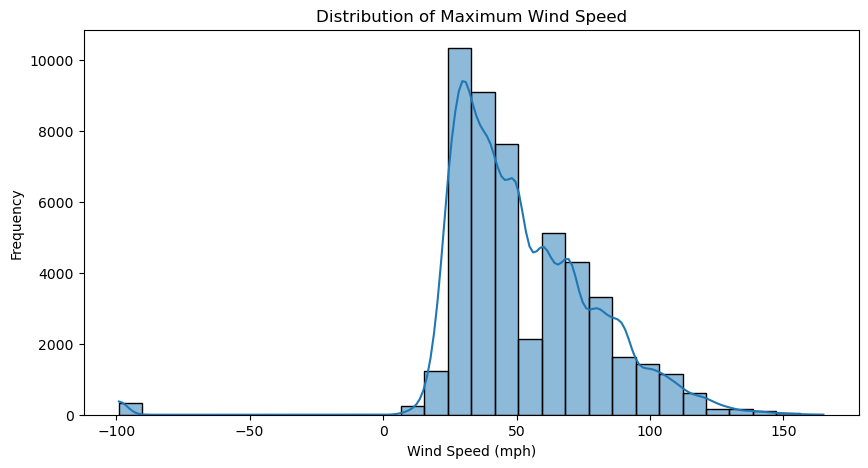

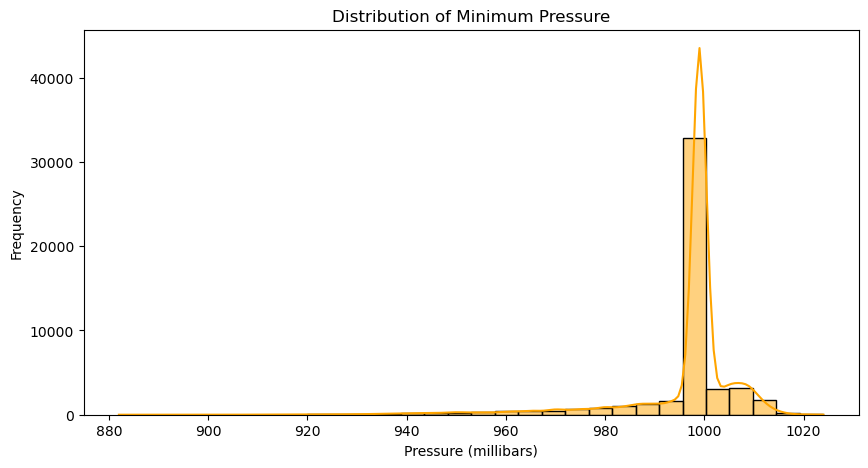

In [77]:
# Distribution of Maximum Wind
plt.figure(figsize=(10, 5))
sns.histplot(data['Maximum Wind'], bins=30, kde=True)
plt.title('Distribution of Maximum Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Minimum Pressure
plt.figure(figsize=(10, 5))
sns.histplot(data['Minimum Pressure'], bins=30, kde=True, color='orange')
plt.title('Distribution of Minimum Pressure')
plt.xlabel('Pressure (millibars)')
plt.ylabel('Frequency')
plt.show()


In [81]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'AL011851'